# PML Lecture 8: The scheme of a machine learning program

## Quick review

1. Machine learning learns models from a set of **n observations (also known as sample, example, instance, record)** of data and then tries to predict **properties** of new data.
2. Two categories: supervised learning and unsupervised learning
3. Training and test stages. The primary goal of machine learning is to build model that generalizes to new data

4. Learn machine learning basics "An introduction to machine learning with scikit-learn" from the tutorials at https://scikit-learn.org/stable/tutorial/index.html

5. Learn the numpy array.
    https://numpy.org/devdocs/user/quickstart.html

In [1]:
import sklearn as sk
print(sk.__version__)
#dir(sk)

0.24.2


## Agenda

- Numpy Array
- An example
- What machine learning can do? (more examples) 

- Machine learning algorithms--An overview

- The scheme of a machine learning program

- A simple machine algorithm

- Paractise less basic operations of numpy array (After Class)

In [2]:
import numpy as np
np.__version__

'1.20.3'

In [18]:
# numpy basics
import numpy as np

# create a np array using python list and set data type
a = np.array([1, 2, 3])
b = np.array([[1, 2, 4],[5, 6, 7]])

# shape is the dimensions
print('shape:', b.shape)

# datatype must be homogeneous
print('datatype:', b.dtype)

# useful function to create np array
c = np.array([1, 2, 3.5])
print(c)

d = np.array([1.2, 1.3], dtype=int)
print(d)

e = np.zeros((4, 4))
print(e)

f = np.ones((4, 4))
print(f)

# Change the shape of an numpy array
g = np.array([1, 2, 3, 4, 5, 6])
print(g.shape)
g = g.reshape(2, 3)
print(g.shape)
print(g)

shape: (2, 3)
datatype: int64
[1.  2.  3.5]
[1 1]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
(6,)
(2, 3)
[[1 2 3]
 [4 5 6]]


### Example: Iris Classification
1. The 'Hello World!' task in machine learning: Iris classification
The Iris dataset

```python
    import sklearn.datasets as ds
    iris = ds.load_iris()
```
    1. 150 observations; 3 different species, and 50 observations for each species.
    2. 4 fearures:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
    3. Class labels (Species): Iris-Setosa, Iris-Versicolour, and Iris-Virginica
![Figure 1: Machine Learning](Iris1.png)    

In [19]:
# explore the iris dataset
import sklearn.datasets as ds

iris = ds.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [38]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [22]:
# load data to numpy array
data = iris.data
tgts = iris.target
print(data.shape, tgts.shape)

(150, 4) (150,)


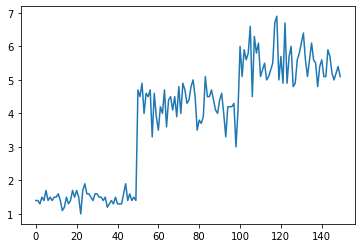

In [31]:
import matplotlib.pyplot as plt

plt.plot(data[:, 2])

In [27]:
# count the # of samples for each categories
c1 = (tgts == 0)
n_c1 = c1.sum()
print(n_c1)
c2 = (tgts == 2)
n_c2 = c2.sum()
print(n_c2)

50
50


## What machine learning can do? (more examples)
1. Example Day-to-Day Life 
    - Face ID and fingerprint ID
    - Email Spam and Malware Filtering (ANN and Decision Tree algorithms) https://www.kaggle.com/c/email-spam/overview 
    - Product Recommendations, e.g., Netflix Prize https://en.wikipedia.org/wiki/Netflix_Prize 
    - Online custermer support, e.g., chatbot
    - Search Engine Result Refining
    - ...

2. Advanced applications
    - Video surveillance, e.g., critical locations monitoring, traffic monitoring, and wild fire early detection
    - Self-Driving. https://carla.readthedocs.io/en/latest/cameras_and_sensors/#camera-semantic-segmentation
    - Medical diagnosis, e.g., computer-aided diagnosis (CAD) systems. https://nihcc.app.box.com/v/DeepLesion
    - Machine Translator
    - Natural language processing. https://en.wikipedia.org/wiki/Natural_language_processing
    - Fake banknote detection
    - ...

3. Do you have other examples/experience to share?

## Machine learning algorithms--An overview

1. Supervised learning
    1. Regression. Linear regression (4), decision tree (5) and random forests (6), K-nearest neighbors (KNN)(1), Neural networks,...
    2. Classification. K-nearest neighbors (KNN)(1), Logistic regression (2),Support Vector Machines (3), Neural networks (9), Convolutional neural networks (CNNS) (10)... 
    
2. Unsupervised learning. K-means (7), spectral clustering (8), ...

*The numbers in the parenthesis indicate the learning order of these algorithms in this class. we will move 9 and partial 10 to module 4. 

## The scheme of a machine learning program
1. Data preparation
2. Training
3. Prediction and evaluation
4. **Model persistence**

In [12]:
#First Machine Learning
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

#1. data preparation
#1.1 load some data to play with
iris = datasets.load_iris()
X = iris.data # feature vectors
y = iris.target # class labels

#1.2. Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#2. model training: SVC: support vector classification
my_classifier = svm.SVC(kernel='linear', C=0.5)
my_classifier.fit(X_train, y_train)

#3. prediction and evaluation
# 3.1 prediction
y_train_predict = my_classifier.predict(X_train)
print('prediction:', y_train_predict)
print('real:', y_train)

#3.2 evaluation
# error rate: # error output / toal # of samples
err = (y_train_predict != y_train).sum()
err_rate = round(err / y_train.shape[0], 4) * 100
print(f'err_rate: {err_rate}%')

# Test error rate
y_test_predict = my_classifier.predict(X_test)
test_err = (y_test_predict != y_test).sum()
test_err_rate = round(test_err / y_test.shape[0], 4) * 100
print(f'test_err_rate: {test_err_rate}%')

prediction: [1 2 2 0 1 0 0 1 2 0 1 2 1 1 2 0 0 1 1 1 0 1 0 0 1 1 2 1 2 0 0 0 2 2 0 1 0
 1 1 0 1 0 2 0 2 0 0 1 2 1 2 2 1 2 1 2 0 2 1 2 1 2 1 0 1 1 0 0 2 2 2 0 1 1
 1 1 0 2 2 2 1 0 2 2 2 1 1 1 0 1 0 0 1 0 0 0 0 2 2 0 0 2 2 0 2]
real: [1 2 2 0 1 0 0 1 2 0 1 2 1 1 2 0 0 1 1 1 0 1 0 0 1 1 2 1 2 0 0 0 1 2 0 1 0
 1 1 0 1 0 2 0 2 0 0 1 2 1 2 2 1 2 1 2 0 2 1 2 1 2 1 0 1 1 0 0 2 2 2 0 1 1
 1 1 0 2 2 2 1 0 2 2 2 1 1 1 0 1 0 0 1 0 0 0 0 2 2 0 0 2 2 0 2]
err_rate: 0.95%
test_err_rate: 0.0%


In [19]:
## predicted class labels for the test set


## true class labels of the test set



### Practise less basic operations of numpy array 

In [84]:
# basics
import numpy as np

# create
arr = np.array([1, 2, 3], dtype = float)
print(arr.dtype.name)
arr1 = np.array([4, 5, 6], dtype = float)

# element-wise operations
arr + arr1
arr * arr1
arr - arr1

#indexing by integers and slicing
a = np.arange(10)*2
print(a)
print(a[0:6:2]) # 2 is the step

# stack
print(np.vstack((arr, arr1)))
print(np.hstack((arr, arr1)))
arr3 = np.vstack((arr, arr1))
arr3 - arr1

float64
[ 0  2  4  6  8 10 12 14 16 18]
[0 4 8]
[[1. 2. 3.]
 [4. 5. 6.]]
[1. 2. 3. 4. 5. 6.]


array([[0., 0., 0.],
       [3., 3., 3.]])

In [22]:
# less basics
# indexing by arrays of integers and arrays of booleans
lst = [1, 2, 3, 4, 5]
print(lst[0::2])

lst1 = np.array(lst)
j = [0, 1, 2]
lst1[j]

j = [0, 0, 1, 2]
lst1[j]

# search the max values
ind = lst1.argmax()
print(ind, lst1[ind])

#assign

lst1[[0, 1, 2]] = -1
lst1

lst1>0
lst1[lst1>0]

[1, 3, 5]
4 5


array([4, 5])

In [21]:
# Broadcasting
# deal with inputs that do not have exactly the same shape

a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
print(a * b)

a = np.array([1.0, 2.0, 3.0])
b = 2.0
print(a * b)

[2. 4. 6.]
[2. 4. 6.]
